In [1]:
from poisson_sprinkling import *

In [41]:
runs = 95
rho = 100
T = list(range(1, 11))
L = 1

In [29]:
relation_nums = {}

In [42]:
for t in T:
    relation_nums[t] = []
    for r in range(runs):
        relation_nums[t].append(0)
        p = poisson_sprinkle_rectangular(100, tlims = [0, t], xlims=[0, 1])
        relate = find_relations_cylinder(p, L)
        for i in relate:
            relation_nums[t][-1] += len(relate[i])

In [43]:
print(relation_nums)

{1: [2343, 4029, 2813, 2045, 3019, 2785, 3684, 3262, 4173, 2781, 2313, 2391, 3095, 3328, 2081, 3171, 2095, 2916, 2827, 3030, 3095, 2606, 2256, 3475, 2503, 2528, 3080, 2998, 3453, 3340, 2290, 3841, 4713, 2955, 3110, 2829, 2583, 3479, 3002, 2547, 3939, 2072, 2957, 3958, 2955, 2679, 2582, 2152, 1877, 3478, 3591, 3873, 1754, 2746, 2740, 3338, 2489, 3210, 3987, 2677, 1988, 2199, 1364, 3881, 1489, 3388, 2043, 3129, 2666, 2368, 3217, 2907, 2917, 3374, 2724, 3505, 2421, 3909, 3007, 1901, 3347, 3391, 2236, 3329, 2089, 2958, 2435, 2246, 2521, 1639, 2167, 3272, 2593, 3745, 3118], 2: [16263, 14983, 16901, 15370, 10971, 10887, 17200, 12010, 15366, 17333, 10453, 15023, 18028, 16019, 14904, 14236, 13769, 13980, 12232, 14828, 14003, 13188, 16089, 17811, 18124, 15783, 12364, 15683, 13885, 16359, 17283, 13426, 14154, 12758, 16279, 13850, 13766, 18082, 16309, 14780, 13668, 15362, 17517, 13465, 12527, 18106, 13517, 17870, 16136, 13065, 12787, 13025, 15393, 16074, 14537, 16471, 14597, 18045, 14980, 17101, 

In [44]:
relations_nums_t = [relation_nums[t] for t in relation_nums]

In [65]:
exp_t = []
exp_t_Ts = T# np.linspace(0, 10)
for t in exp_t_Ts:
    exp_t.append(0.5 * rho**2 * L**2 *(t * (t - 0.5 * L) + L**2 / 24))

msrmt_mu_t = []
msrmt_sigma_t = []
for t in T:
    msrmt_mu_t.append(np.mean(relation_nums[t]))
    msrmt_sigma_t.append(np.std(relation_nums[t]) / (len(relation_nums[t]))**0.5)

# print(msrmt_mu_t)
print(np.array(msrmt_mu_t) + np.array(msrmt_sigma_t))
print(np.array(msrmt_mu_t) - np.array(msrmt_sigma_t))
print(np.array(exp_t))

[  2944.37048339  15591.17624431  38319.66482973  71447.9315426
 112764.67073904 167317.02056595 229445.49547415 301704.26442754
 386919.27364901 483243.4703648 ]
[  2811.44004292  15150.80270306  37323.5562229   70046.84740477
 110650.90820833 164180.05311826 225965.97821006 297198.19873036
 381733.25266678 477465.75068784]
[  2708.33333333  15208.33333333  37708.33333333  70208.33333333
 112708.33333333 165208.33333333 227708.33333333 300208.33333333
 382708.33333333 475208.33333333]


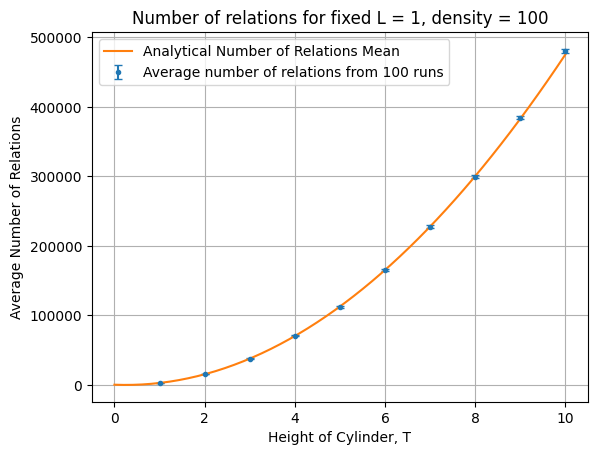

In [64]:
plt.title("Number of relations for fixed L = 1, density = 100")
plt.errorbar(T, msrmt_mu_t, msrmt_sigma_t, capsize=3, fmt = ".", label = "Average number of relations from 100 runs")
plt.plot(exp_t_Ts, exp_t, label = "Analytical Number of Relations Mean")
plt.xlabel("Height of Cylinder, T")
plt.ylabel("Average Number of Relations")
plt.grid()
plt.legend()